In [1]:
import pandas as pd
import pickle
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix

In [2]:
# Download NLTK resources
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to C:\Users\Ansh
[nltk_data]     Viradiya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# Load your dataset (CSV must have 'text' and 'label' columns)
df = pd.read_csv('training_data.csv' , encoding='ISO-8859-1')

In [5]:
df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [6]:
column_names = ['target', 'ids', 'date', 'flag', 'user', 'text']
df.columns = column_names

In [7]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [8]:
df.isnull().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

In [9]:
df.replace({'target':{4:1}}, inplace=True)

In [10]:
df['target'].value_counts()

target
1    800000
0    799999
Name: count, dtype: int64

In [11]:
stemmer = PorterStemmer()

In [12]:
# def porter_stemmer(text):
    
#     # Remove URLs and non-alphabetic characters
#     text = re.sub(r"http\\S+", "", text)
#     text = re.sub(r"[^a-zA-Z ]", "", text)
#     text = text.lower()
#     words = text.split()

#     # Remove stopwords and apply stemming
#     stemmed_words = [stemmer.stem(word) for word in words if word not in stop_words]

#     return " ".join(stemmed_words)

In [13]:
def clean_text(text):
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"[^a-zA-Z ]", "", text)  # Remove special characters and numbers
    text = text.lower()# Clean text function

    return text

In [14]:
# Preprocess dataset
df['clean_text'] = df['text'].apply(clean_text)

In [15]:
df.head()

,target,ids,date,flag,user,text,clean_text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan i dived many times for the ball manag...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass no its not behaving at all im ...
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,kwesidei not the whole crew


In [16]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['target'], test_size=0.2, random_state=42)

In [17]:
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

Training samples: 1279999, Testing samples: 320000


In [18]:
# Vectorize text
vectorizer = TfidfVectorizer(max_features=10000)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [19]:
print(X_test_vect)

  (0, 2484)	0.19217265855862137
  (0, 3816)	0.2811930638879465
  (0, 3870)	0.4730337742270943
  (0, 4265)	0.14139687548739102
  (0, 5047)	0.25484991673937896
  (0, 5745)	0.12543622425623516
  (0, 6626)	0.29025597518696966
  (0, 7034)	0.20737479452119897
  (0, 8860)	0.10308791785670895
  (0, 8907)	0.23695785855634077
  (0, 9052)	0.2770739101555768
  (0, 9386)	0.4099273888114571
  (0, 9500)	0.1748577870707722
  (0, 9854)	0.3002477846527953
  (1, 746)	0.2892139935122233
  (1, 2653)	0.323338274880157
  (1, 3602)	0.3367213880595855
  (1, 3926)	0.46620708542994166
  (1, 4234)	0.17742731488922603
  (1, 5645)	0.2657872700383334
  (1, 6040)	0.2608983290630797
  (1, 8898)	0.26603484378188613
  (1, 8915)	0.23028287714673512
  (1, 9259)	0.21350201231884022
  (1, 9456)	0.3761624280866154
  :	:
  (319997, 3250)	0.21534440972012775
  (319997, 4412)	0.2091412068929878
  (319997, 5019)	0.4908332171983058
  (319997, 6959)	0.6881818099476348
  (319997, 8679)	0.3305073197249052
  (319997, 8683)	0.24420412

In [20]:
print(X_train_vect)

  (0, 8688)	0.1974313937035984
  (0, 7580)	0.614989637062665
  (0, 9537)	0.38509784262079205
  (0, 3469)	0.3409072540412024
  (0, 595)	0.37196709668521494
  (0, 3754)	0.4241827033487543
  (1, 6952)	0.660748940404692
  (1, 3250)	0.24764247444945758
  (1, 4977)	0.45817281221368067
  (1, 9500)	0.30774409326434987
  (1, 559)	0.4443594151266934
  (2, 9500)	0.16241002153861014
  (2, 4439)	0.15923490598581216
  (2, 3568)	0.16696438108330403
  (2, 8683)	0.29641325422702647
  (2, 3750)	0.19330208669618498
  (2, 1635)	0.3302974049541009
  (2, 6096)	0.14112512287528803
  (2, 6173)	0.3606375479780076
  (2, 1890)	0.22656256553120024
  (2, 3851)	0.14685112266196504
  (2, 753)	0.20813671629308497
  (2, 2869)	0.23163903682324438
  (2, 5640)	0.20382100445676196
  (2, 568)	0.39272128889366015
  :	:
  (1279996, 4760)	0.18779180439736542
  (1279996, 7501)	0.23575811051743867
  (1279996, 4634)	0.15007946504943176
  (1279996, 4992)	0.17049156103227475
  (1279996, 8012)	0.24157040737419677
  (1279996, 715)	0

In [21]:
# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vect, y_train)

# Evaluate model
y_pred = model.predict(X_test_vect)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.78      0.79    159494
           1       0.79      0.81      0.80    160506

    accuracy                           0.80    320000
   macro avg       0.80      0.80      0.80    320000
weighted avg       0.80      0.80      0.80    320000



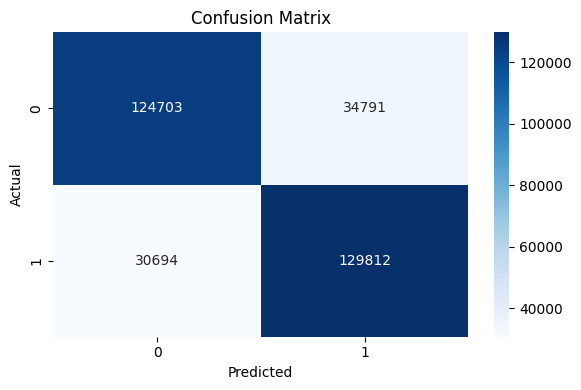

In [22]:
# Confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
labels = sorted(df['target'].unique())
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig("confusion_matrix.png")
plt.show()

In [23]:
# Save model and vectorizer
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

with open('sentiment_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("\nModel and vectorizer saved successfully!")


Model and vectorizer saved successfully!
